Alignment with 2 rows and 142274 columns
-tctttgtcaagtgctgcatgaaaaatttacaatcttgtatggt...--- EM11
ctctttgtcaagtgctgcatgaaaaatttacaagcttgtatggt...ttc EM60


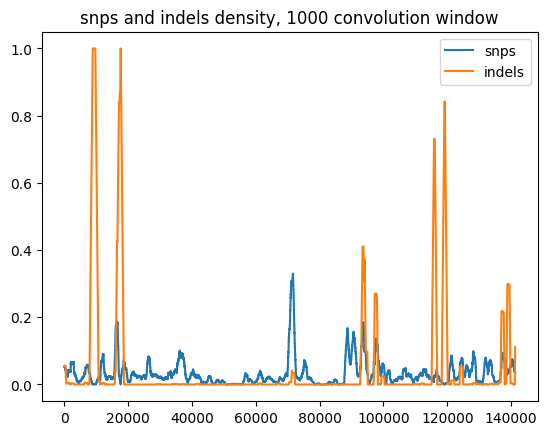

In [5]:
from Bio import AlignIO
import numpy as np
import matplotlib.pyplot as plt

def read_msa(path):
    alignment = AlignIO.read(open(path), "fasta")
    print(alignment)
    l=alignment.get_alignment_length()
    msa_matrix=np.zeros([3,l],dtype=str)
    for i,record in enumerate(alignment):
        for pos,nuc in enumerate(record.seq):
            msa_matrix[i][pos]=nuc
    return msa_matrix

def analyse_msa_matrix(msa_matrix):
    l=len(msa_matrix[0])
    snps = np.zeros(l, dtype=int)
    indels = np.zeros(l, dtype=int)

    for pos,array in enumerate(msa_matrix[0]):
        nuc_first_ref=msa_matrix[0,pos]
        nuc_second_ref=msa_matrix[1,pos]
        if nuc_first_ref=='-' or nuc_second_ref=='-':
            indels[pos]=1
        else:
            if nuc_first_ref!=nuc_second_ref:
                snps[pos]=1

    
    return snps, indels

if __name__ == "__main__":

    file=f'/home/jack/code/recombinant_population_analysis/results/msa/refs_msa.fasta'
    #out_folder=f'recombinant_population_analysis/results/plots/refs_aligned.png'

    msa_matrix = read_msa(file)

    snps, indels = analyse_msa_matrix(msa_matrix)
    snps_density=np.convolve(snps, np.ones(1000), mode='valid')/1000
    indels_density=np.convolve(indels, np.ones(1000), mode='valid')/1000

    plt.plot(snps_density, label='snps')
    plt.plot(indels_density, label='indels')
    plt.title('snps and indels density, 1000 convolution window')
    plt.legend()
    plt.show()

    #huge gap in em60